# Práctica 4 #  
Grupo: Tralalelo Tralala  
Integrantes: Yuriy Chaban Markevych, Pablo García Fernández, Alejandro Rodríguez Giner y Alonso Campillo Martínez  

# Introducción  
Aquí explicamos el trabajo y la motivación por hacerlo

# Dataset  
Explicamos el dataset elegido, las columnas que vamos a usar y hacemos la limpieza de los datos (previo análisis). Vamos a tratar todos los campos del dataframe como strings. Si en algún futuro necesitamos tratar los datos como números, simplemente los convertiremos.

In [3]:
import sklearn as skl
import pandas as pd
import numpy as np

_prestamos = pd.read_csv('dataset.csv')


Ahora vamos a mostrar los 4 primeros y los 4 últimos para asegurar que funciona el dataset a la perfección.

In [4]:
display(_prestamos.head(n=4))
display(_prestamos.tail(n=4))
print(_prestamos.columns.tolist())

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


Limpiamos el dataframe para que no tengamos problemas con las claves y las columnas en el futuro, concretamente quitando los espacios en blanco 
y quitando el loan_id (ya que es un dato innecesario para la predicción del modelo).

In [5]:
_prestamos.columns = _prestamos.columns.str.strip()
_prestamos = _prestamos.applymap(lambda x: x.strip() if isinstance(x, str) else x)
display(_prestamos.head(n=1))

columnas= ["no_of_dependents", "education", "self_employed", "income_annum", "loan_amount", "loan_term", "cibil_score", "residential_assets_value", "commercial_assets_value","luxury_assets_value","bank_asset_value","loan_status"] 
_prestamos= _prestamos[columnas]

display(_prestamos)

/tmp/ipykernel_15800/2221218118.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _prestamos = _prestamos.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


Aplicamos ahora One Hot Encoder a los atributos categóricos. Usaremos el método unique para identificar los valores únicos de esa columna, de manera que podamos detectar si hay algun valor erróneo. Finalmente, aplicamos OneHotEncoder para convertir la columna en valores binarios.

In [6]:
self_employed_data= _prestamos['self_employed'].unique() 
print(self_employed_data)

education_data= _prestamos['education'].unique() 
print(education_data)

loan_status_data= _prestamos['loan_status'].unique() 
print(loan_status_data)

columnas_categoricas = ['self_employed', 'education', 'loan_status']

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

categorical_encoded = encoder.fit_transform(_prestamos[columnas_categoricas])

categorical_encoded_df = pd.DataFrame(
    categorical_encoded,
    columns=encoder.get_feature_names_out(columnas_categoricas)
)

_prestamos = pd.concat(
    [_prestamos.drop(columns=columnas_categoricas), categorical_encoded_df],
    axis=1
)

display(_prestamos)


['No' 'Yes']
['Graduate' 'Not Graduate']
['Approved' 'Rejected']


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,self_employed_Yes,education_Not Graduate,loan_status_Rejected
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0.0,0.0,0.0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0,1.0,1.0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0,0.0,1.0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0,0.0,1.0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1.0,0.0,1.0
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1.0,1.0,0.0
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0.0,1.0,1.0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0.0,1.0,0.0


Ahora miramos los atributos numericos. A todas las columnas les aplicaremos la conversión a numérico para evitar que queden representados en otro tipo de datos (por ejemplo, String). Previo a ello miraremos los valores numéricos de cada columna con el fin de observar posibles valores extraños. Además, en el caso de los activos, cantidad solicitada y plazos revisaremos el valor mínimo, pues no debe ser negativo, y en el caso del CIBIL el valor máximo y mínimo, pues es una puntuación que debe estar entre 300 y 900.

In [7]:
def no_negativos(x):
    if x < 0:
        return 0
    else:
        return x

dependents_data= _prestamos['no_of_dependents'].unique() 
print(dependents_data)
_prestamos['no_of_dependents'] = pd.to_numeric(_prestamos['no_of_dependents'], errors='coerce')

annum_data= _prestamos['income_annum'].unique() 
print(annum_data)
_prestamos['income_annum'] = pd.to_numeric(_prestamos['income_annum'], errors='coerce')

loan_amount_data = _prestamos['loan_amount'].unique()
print(loan_amount_data)
_prestamos['loan_amount'] = pd.to_numeric(_prestamos['loan_amount'], errors='coerce')
print(_prestamos['loan_amount'].min())

loan_term_data = _prestamos['loan_term'].unique()
print(loan_term_data)
_prestamos['loan_term'] = pd.to_numeric(_prestamos['loan_term'], errors='coerce')
print(_prestamos['loan_term'].min())

_prestamos['cibil_score'] = pd.to_numeric(_prestamos['cibil_score'], errors='coerce')
cibil_score_data = _prestamos['cibil_score'].unique()
print(cibil_score_data) 
print(_prestamos['cibil_score'].min(), _prestamos['cibil_score'].max()) 

residential_assets_value_data = _prestamos['residential_assets_value'].unique()
print(residential_assets_value_data)
_prestamos['residential_assets_value'] = pd.to_numeric(_prestamos['residential_assets_value'], errors='coerce')
print(_prestamos['residential_assets_value'].min())
#Como tiene valores negativos los convertimos a 0, ya que no pueden ser negativos
_prestamos['residential_assets_value'] = _prestamos['residential_assets_value'].apply(no_negativos)
print(_prestamos['residential_assets_value'].min())


commercial_assets_value_data = _prestamos['commercial_assets_value'].unique()
print(commercial_assets_value_data) 
_prestamos['commercial_assets_value'] = pd.to_numeric(_prestamos['commercial_assets_value'], errors='coerce')
print(_prestamos['commercial_assets_value'].min())


luxury_assets_value_data = _prestamos['luxury_assets_value'].unique()
print(luxury_assets_value_data)
_prestamos['luxury_assets_value'] = pd.to_numeric(_prestamos['luxury_assets_value'], errors='coerce')
print(_prestamos['luxury_assets_value'].min())

bank_asset_value_data = _prestamos['bank_asset_value'].unique()
print(bank_asset_value_data)
_prestamos['bank_asset_value'] = pd.to_numeric(_prestamos['bank_asset_value'], errors='coerce')
print(_prestamos['bank_asset_value'].min())

[2 0 3 5 4 1]
[9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000  800000
 1100000 2900000 6700000 5000000 1900000 4700000  500000 2700000 6300000
 5800000 6500000 4900000 3100000 2400000 7000000 9000000 8400000 1700000
 1600000 8000000 3600000 1500000 7800000 1400000 4200000 5500000 9500000
 7300000 3800000 5100000 4300000 9300000 7400000 8500000 8800000 3300000
 3900000 8300000 5600000 5300000 2600000  700000 3500000 9900000 3000000
 6800000 2000000 1000000  300000 6600000 9400000 4400000  400000 6200000
 9700000 7100000  600000 7200000  900000  200000 1800000 4600000 2200000
 2500000 8600000 4000000 5200000 8900000 1300000 4500000 8100000 9200000
 2800000 7500000 6400000 6900000 7700000 3200000 7900000 5900000 3400000
 2100000 3700000 5400000 2300000 7600000 6000000 6100000 1200000]
[29900000 12200000 29700000 30700000 24200000 13500000 33000000 15000000
  2200000  4300000 11200000 22700000 11600000 31500000  7400000 10700000
  1600000  9400000 10300000 14600000 1940000

Por último, para facilitar el desarrollo de los distintos modelos, vamos a renombrar las columnas y vamos a guardar el resultado en un archivo csv, de manera que para cada nueva evaluación se cargue el fichero ya limpio.

In [8]:
columnas = {'no_of_dependents':'Personas a cargo',
            'income_annum': 'Ingreso Anual',
            'loan_amount': 'Cantidad del prestamo',
            'loan_term' : 'Plazos',
            'cibil_score': 'Puntos CIBIL',
            'residential_assets_value': 'Activos residenciales',
            'commercial_assets_value': 'Activos comerciales',
            'luxury_assets_value': 'Activos de lujo',
            'bank_asset_value': 'Activos bancarios',
            'self_employed_Yes': 'Autonomo',
            'education_Not Graduate': 'No graduado',
            'loan_status_Rejected': 'Prestamo rechazado'
}

_prestamos.rename(columns=columnas, inplace=True)
_prestamos.to_csv('dataset_clean.csv', index=False)

# Evaluación  
Aquí va la predicción como tal (añadir gráficas si es posible)

### KNN  
desarrollo

Predicción: [1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.

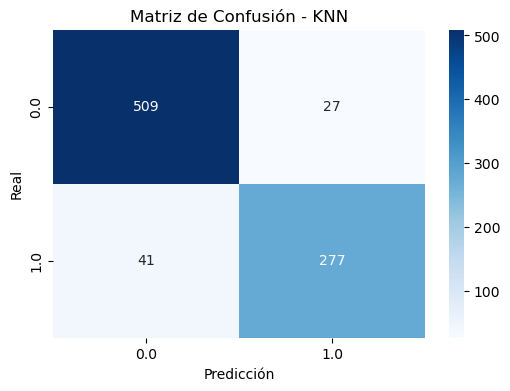

In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('dataset_clean.csv')

x = data.drop(columns=['Prestamo rechazado'])
y = data['Prestamo rechazado']

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Se han hecho múltiples pruebas de k y el mejor score suele estar sobre 70
model = knc(n_neighbors=70, weights='distance')

model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(f"Predicción: {prediction}")
print(f"Test: {y_test}")

score = model.score(x_test, y_test)
print(f"Score: {score}")

cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - KNN')
plt.show()


# Conclusiones  
Conclusiones sacadas del estudio